# **Energy Consumption Forecasting (Energy Consumption Dataset)**
---

### Produced By: Kaung Myat San (DAAA/FT/1B/03)
### Date: 13.1.2025

### Problem Statement - Forecasting gas, electricity and water for the next 60 months

# Import Required Libraries
Import necessary libraries, including pandas, numpy, matplotlib, and statsmodels.

In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
import itertools
from itertools import product
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Load and Explore Dataset
Load the CA2-Energy-Consumption-Data.csv dataset and perform initial exploration, including checking for missing values and basic statistics.

In [202]:
# Load and Explore Dataset

# Load the dataset
data = pd.read_csv('CA2-Energy-Consumption-Data.csv')


In [203]:
# Display the first few rows of the dataset
data.head()

DATE  Gas Consumption (tons)  Electricity Consumption (MWh)  \
0  1/1/1990                    18.0                          725.1   
1  1/2/1990                    15.8                          706.7   
2  1/3/1990                    17.3                          624.5   
3  1/4/1990                    18.9                          574.7   
4  1/5/1990                    22.0                          553.2   

   Water Consumption (tons)  
0                     548.8  
1                     640.7  
2                     511.1  
3                     515.3  
4                     488.4

In [204]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 DATE                             0
Gas Consumption (tons)           0
Electricity Consumption (MWh)    0
Water Consumption (tons)         0
dtype: int64


In [205]:
# Display basic statistics of the dataset
data.describe()

Gas Consumption (tons)  Electricity Consumption (MWh)  \
count              397.000000                     397.000000   
mean                23.785139                     888.472544   
std                  4.903452                     153.877594   
min                 11.600000                     553.200000   
25%                 20.200000                     771.100000   
50%                 23.500000                     897.800000   
75%                 27.900000                    1005.200000   
max                 46.000000                    1294.000000   

       Water Consumption (tons)  
count                397.000000  
mean                 484.953652  
std                  133.908863  
min                   44.400000  
25%                  384.400000  
50%                  487.400000  
75%                  580.200000  
max                  811.000000

In [206]:

# Convert the 'DATE' column to datetime format
data['DATE'] = pd.to_datetime(data['DATE'], format='%d/%m/%Y')

# Set the 'DATE' column as the index
data.set_index('DATE', inplace=True)
data = data.asfreq('MS')

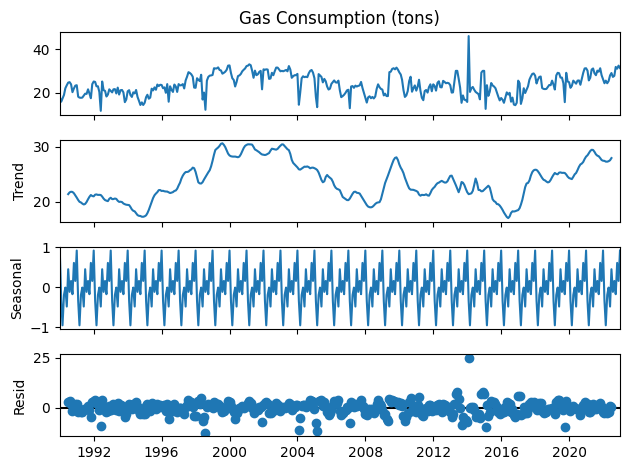

In [207]:


# Decompose Gas Consumption
gas_decomposition = seasonal_decompose(data['Gas Consumption (tons)'], model='additive')
gas_decomposition.plot()
plt.show()

Overall Gas Consumption has increase since 1990.

Trend-
- 1990 to 1996: stable
- 1996 to 2004: growth
- 2004 to 2016: decline with some spike
- 2016 to 2023: growth

- Consistent Seasonal Pattern (every year)
- Outlier in 2014


#### Convert Outlier

In [208]:
# Calculate the mean of 'Gas Consumption (tons)'
mean_gas_consumption = data['Gas Consumption (tons)'].mean()

# Replace values over 40 with the mean
data.loc[data['Gas Consumption (tons)'] > 40, 'Gas Consumption (tons)'] = mean_gas_consumption


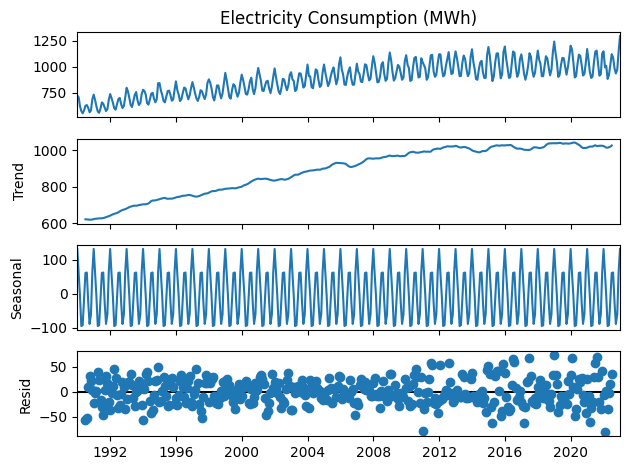

In [209]:
# Decompose Electricity Consumption
electricity_decomposition = seasonal_decompose(data['Electricity Consumption (MWh)'], model='additive')
electricity_decomposition.plot()
plt.show()

Overall Electricity Consumption has increased by about 400 MWh\
Trend- Upward Non-linear Trend\
Seasonal-
- fluctuation between 100 and -100 MWh
- Consistent Seasonal Pattern

Increase Variation in Residual as year increases


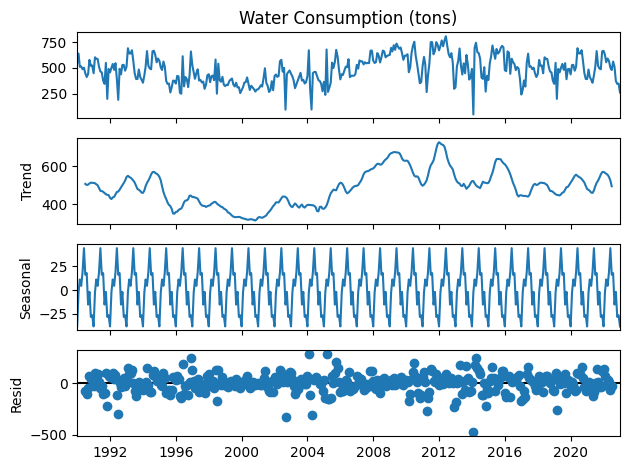

In [210]:
# Decompose Water Consumption
water_decomposition = seasonal_decompose(data['Water Consumption (tons)'], model='additive')
water_decomposition.plot()
plt.show()

High Fluctuation over time\
Sharp Drop at some periods (2013, 2004)\
Trend:
- 1990 to 1995- stable
- 1995 to 2000 – decline 
- 2000 to 2010 – gradual increase
- 2010 to 2023 – several peaks and drops

Consistent Seasonal Pattern\
Constant Variation in Residual as year increases ( slight outliers)


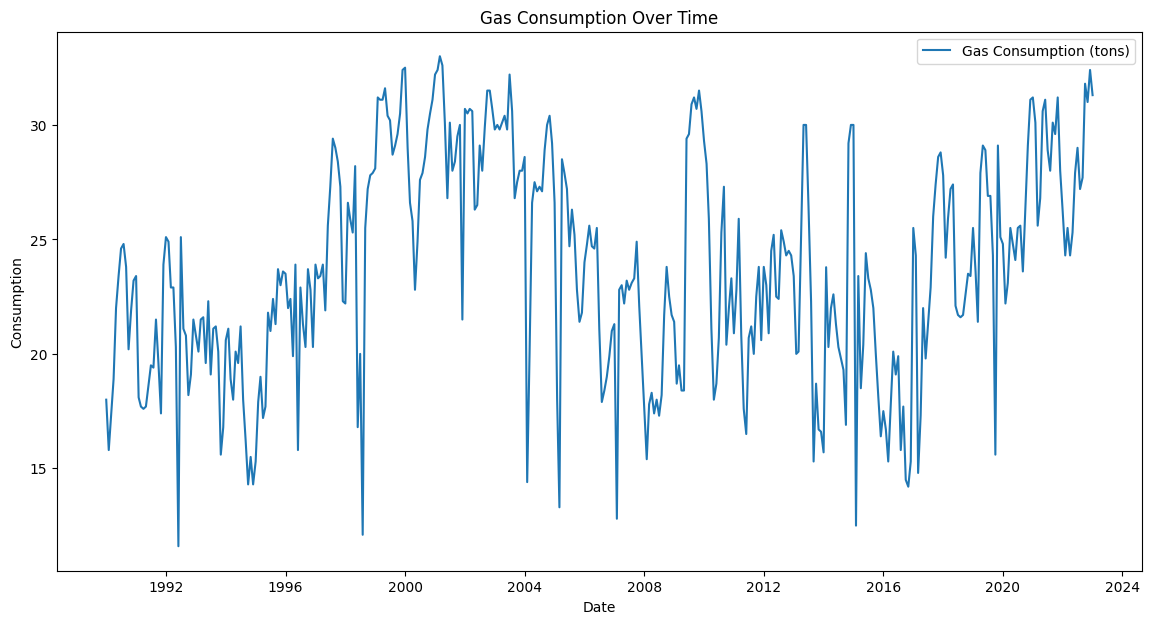

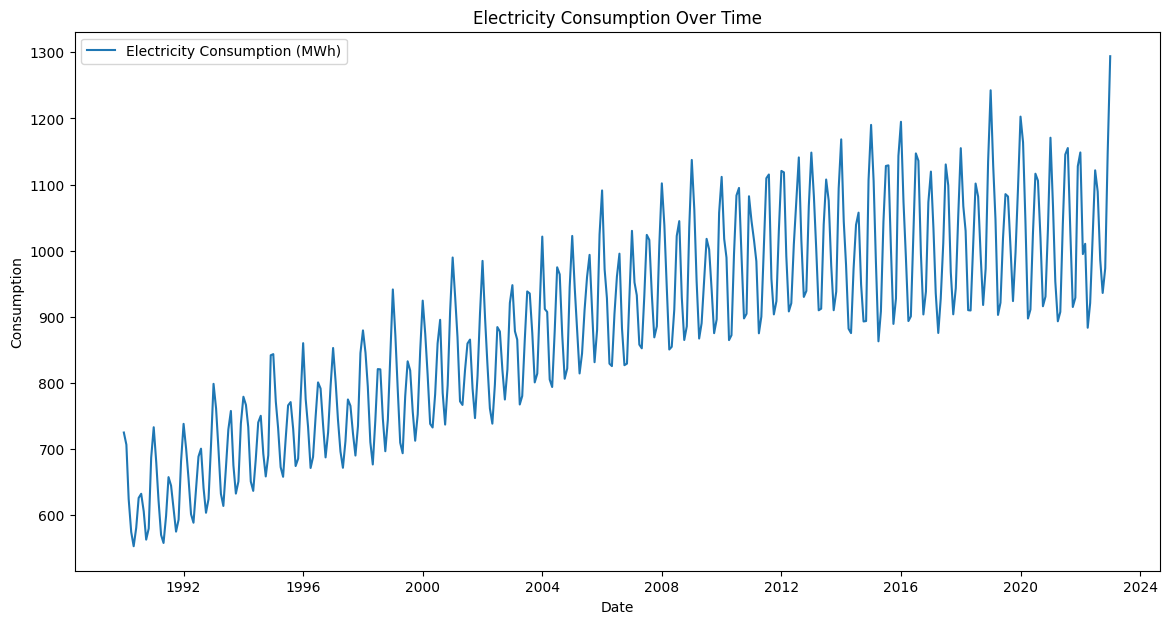

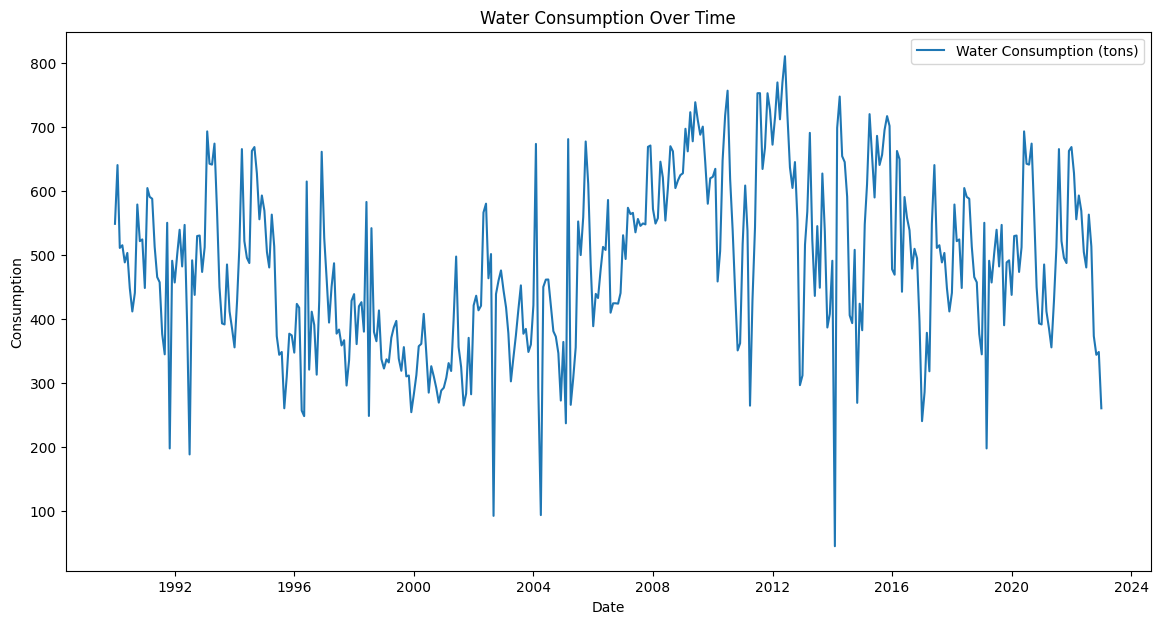

In [211]:
# Plot the time series data
plt.figure(figsize=(14, 7))
plt.plot(data['Gas Consumption (tons)'], label='Gas Consumption (tons)')
# data_1 = data['Gas Consumption (tons)'][-30:]
# data_1['Gas Consumption (tons)- test'] = data['Gas Consumption (tons)'].iloc[39:69].values + 5
# plt.plot(data_1, label='Gas Consumption (tons)- test')
plt.title('Gas Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Consumption')
plt.legend()
plt.show()
plt.figure(figsize=(14, 7))
plt.plot(data['Electricity Consumption (MWh)'], label='Electricity Consumption (MWh)')
plt.title('Electricity Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Consumption')
plt.legend()
plt.show()
plt.figure(figsize=(14, 7))
plt.plot(data['Water Consumption (tons)'], label='Water Consumption (tons)')
plt.title('Water Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Consumption')
plt.legend()
plt.show()

In [212]:
data.head()

Gas Consumption (tons)  Electricity Consumption (MWh)  \
DATE                                                                
1990-01-01                    18.0                          725.1   
1990-02-01                    15.8                          706.7   
1990-03-01                    17.3                          624.5   
1990-04-01                    18.9                          574.7   
1990-05-01                    22.0                          553.2   

            Water Consumption (tons)  
DATE                                  
1990-01-01                     548.8  
1990-02-01                     640.7  
1990-03-01                     511.1  
1990-04-01                     515.3  
1990-05-01                     488.4

# Checking stationary

In [213]:
# Function to check stationarity
def check_stationarity(timeseries):
    result = adfuller(timeseries)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    for key, value in result[4].items():
        print('Critical Values:')
        print(f'   {key}, {value}')

# Check stationarity for each column
for column in data.columns:
    print(f'Checking stationarity for {column}')
    check_stationarity(data[column])
    print('\n')

Checking stationarity for Gas Consumption (tons)
ADF Statistic: -3.685036961706934
p-value: 0.004328613757932691
Critical Values:
   1%, -3.4471856790801514
Critical Values:
   5%, -2.868960436182993
Critical Values:
   10%, -2.5707229006220524


Checking stationarity for Electricity Consumption (MWh)
ADF Statistic: -2.2569805495925475
p-value: 0.18621802300336437
Critical Values:
   1%, -3.4476305904172904
Critical Values:
   5%, -2.869155980820355
Critical Values:
   10%, -2.570827146203181


Checking stationarity for Water Consumption (tons)
ADF Statistic: -4.684845541682447
p-value: 8.984549388336906e-05
Critical Values:
   1%, -3.44714244478345
Critical Values:
   5%, -2.8689414326247995
Critical Values:
   10%, -2.5707127699396084




**Gas Consumption (tons)**\
Since the p-value (0.0108) is less that 5 % and ADF Statistics (-3.685) < 1% Critical Value (3.447), We can assume that  **Gas Consumption** is stationary at 5% significant level

**Electricity Consumption (MWh)**\
Since the p-value (0.186) is more that 5 % and ADF Statistics (-2.26) is larger than all Critical Value, We can assume that  **Electricity Consumption** is not stationary.

**Water Consumption (tons)**\
Since the p-value (8.98e-05) is less that 5 % and ADF Statistics (-4.68) < 1% Critical Value (-3.45), We can assume that  **Water Consumption** is stationary at 1% significant level

# Converting Electricity Consumption to Stationary

In [214]:
print(data.head())

            Gas Consumption (tons)  Electricity Consumption (MWh)  \
DATE                                                                
1990-01-01                    18.0                          725.1   
1990-02-01                    15.8                          706.7   
1990-03-01                    17.3                          624.5   
1990-04-01                    18.9                          574.7   
1990-05-01                    22.0                          553.2   

            Water Consumption (tons)  
DATE                                  
1990-01-01                     548.8  
1990-02-01                     640.7  
1990-03-01                     511.1  
1990-04-01                     515.3  
1990-05-01                     488.4  


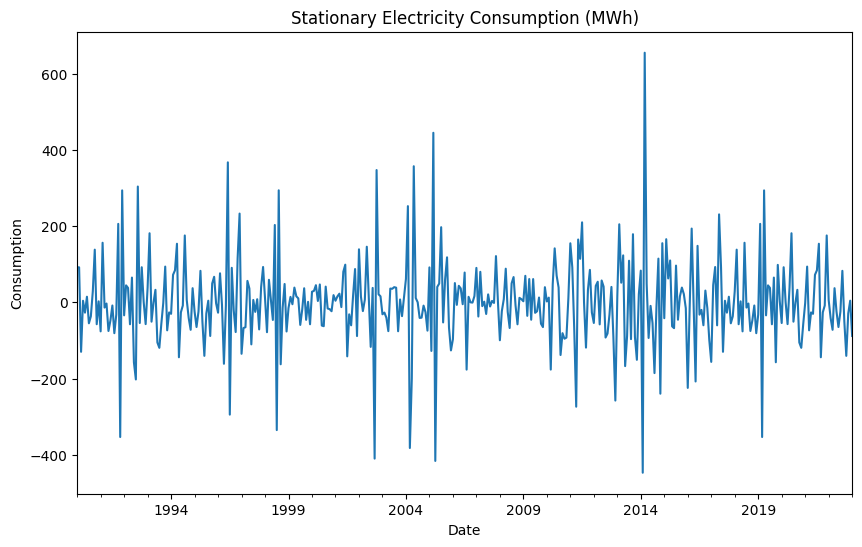

Checking stationarity for Electricity Consumption (MWh) after differencing
ADF Statistic: -9.079853640955156
p-value: 4.084016948208921e-15
Critical Values:
   1%, -3.4474498334928687
Critical Values:
   5%, -2.8690765390453703
Critical Values:
   10%, -2.570784795075055


In [215]:
# Function to make time series stationary
def make_stationary(timeseries):
    timeseries_diff = timeseries.diff().dropna()
    return timeseries_diff

# # Make each column stationary if it is not
data["Stationary Electricity Consumption (MWh)"] = make_stationary(data[column])
data["Stationary Electricity Consumption (MWh)"] = data["Stationary Electricity Consumption (MWh)"].bfill()

#plotting stationary time series (Electricity Consumption (MWh))
data['Stationary Electricity Consumption (MWh)'].plot(subplots=True, figsize=(10, 6))
plt.title('Stationary Electricity Consumption (MWh)')
plt.xlabel('Date')
plt.ylabel('Consumption')
plt.show()

# Check stationarity for each column again
print(f'Checking stationarity for Electricity Consumption (MWh) after differencing')
check_stationarity(data["Stationary Electricity Consumption (MWh)"])

The electricity consumption time series is now stationary.

#### Testing Stationary Electricity Consumption Usefulness

Stationary Electricity Consumption Model - MSE: 12159.80523603785, MAE: 79.65006237159687, MAPE: 395.460%


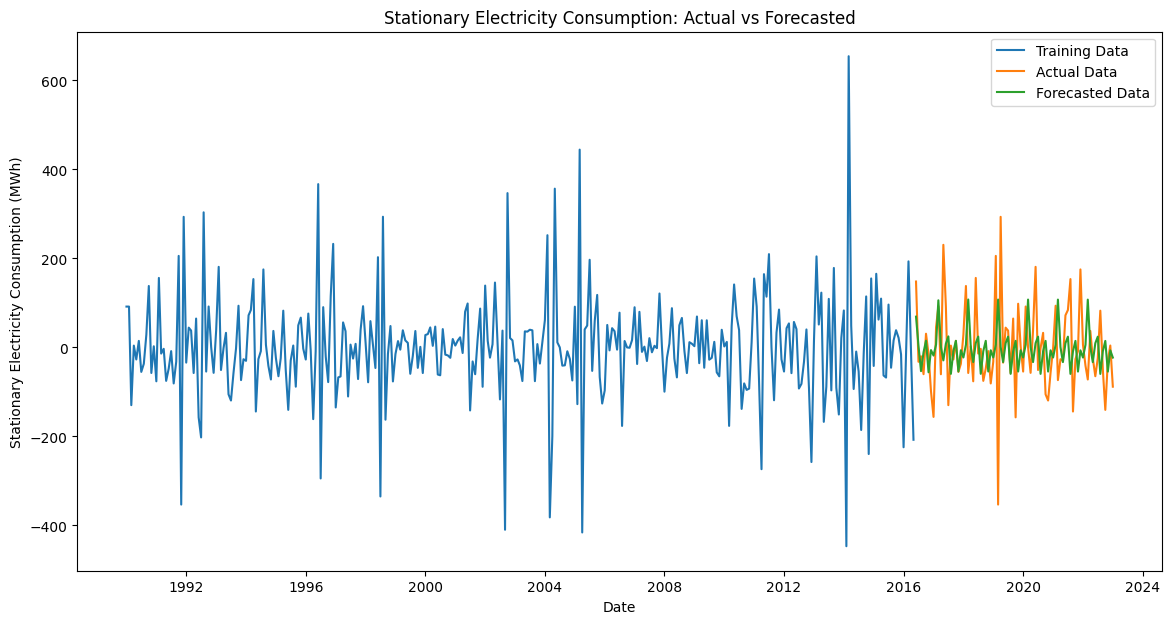

In [216]:
# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

# Build and fit the SARIMA model for Stationary Electricity Consumption
stationary_electricity_model = sm.tsa.SARIMAX(train_data['Stationary Electricity Consumption (MWh)'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
stationary_electricity_model_fit = stationary_electricity_model.fit(disp=False)

# Forecast Stationary Electricity Consumption
stationary_electricity_forecast = stationary_electricity_model_fit.forecast(steps=len(test_data))
stationary_electricity_forecast = pd.Series(stationary_electricity_forecast, index=test_data.index)

# Evaluate the model performance
stationary_electricity_mse = mean_squared_error(test_data['Stationary Electricity Consumption (MWh)'], stationary_electricity_forecast)
stationary_electricity_mae = mean_absolute_error(test_data['Stationary Electricity Consumption (MWh)'], stationary_electricity_forecast)
stationary_electricity_mape = mean_absolute_percentage_error(test_data['Stationary Electricity Consumption (MWh)'], stationary_electricity_forecast)

print(f'Stationary Electricity Consumption Model - MSE: {stationary_electricity_mse}, MAE: {stationary_electricity_mae}, MAPE: {(stationary_electricity_mape*100):.3f}%')

# Plot the forecast vs actuals for Stationary Electricity Consumption
plt.figure(figsize=(14, 7))
plt.plot(train_data['Stationary Electricity Consumption (MWh)'], label='Training Data')
plt.plot(test_data['Stationary Electricity Consumption (MWh)'], label='Actual Data')
plt.plot(stationary_electricity_forecast, label='Forecasted Data')
plt.title('Stationary Electricity Consumption: Actual vs Forecasted')
plt.xlabel('Date')
plt.ylabel('Stationary Electricity Consumption (MWh)')
plt.legend()
plt.show()

MAPE of 395% indicates the model’s prediction is 4times off from the actual value.\
The Prediction fit poorly on the graph.\
Have Tested Different Parameters (lowest): MAPE= 99%
This shows that Stationary Electricity Consumption is bad for forecasting.


#### Checking Pattern in Gas Consumption

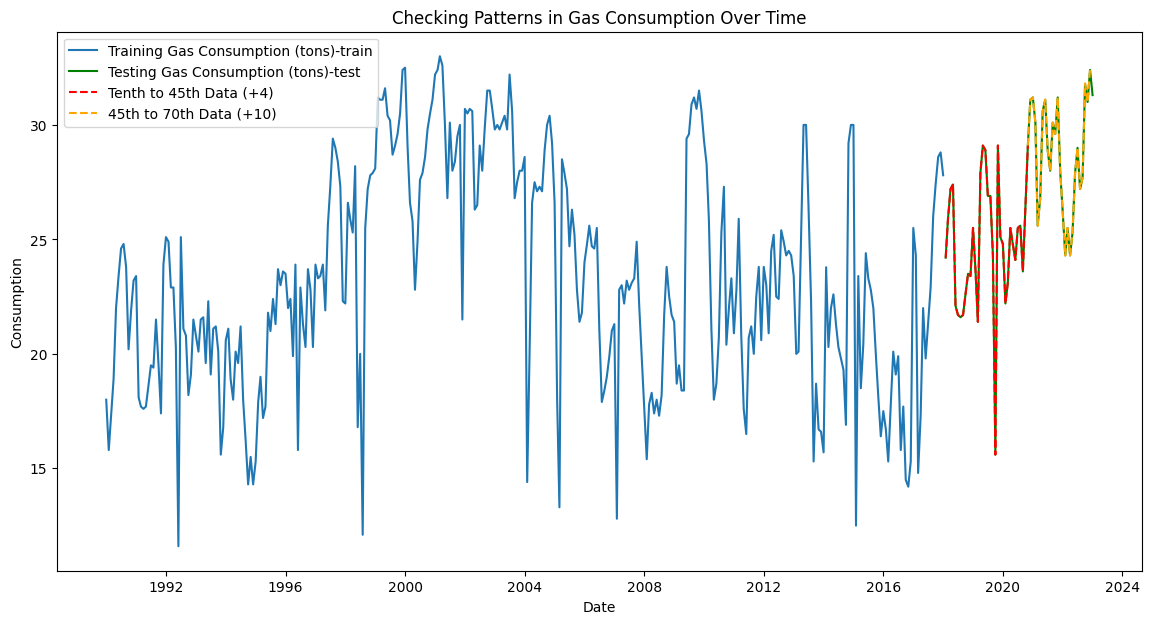

In [217]:
# Split Data into Training and Testing Sets

# Define the number of months to forecast
forecast_period = 60

# Split the data into training and testing sets
train_gas = data[:-forecast_period]
test_gas = data[-forecast_period:]

# Plot the training and testing sets
plt.figure(figsize=(14, 7))
plt.plot(train_gas['Gas Consumption (tons)'], label='Training Gas Consumption (tons)-train')
plt.plot(test_gas['Gas Consumption (tons)'], label='Testing Gas Consumption (tons)-test', color='green')
test_gas = test_gas.copy()
# get the data I want to check if there is duplicate
# added since the data is not the same value at the newer time
test_gas['Gas Consumption (tons)- test']= train_gas['Gas Consumption (tons)'].iloc[9:69].values + 4
# added since the data is not the same value at the newer time
test_gas.loc[test_gas.index[33:59], 'Gas Consumption (tons)- test'] += 6
# print(test_gas.head())
# plt.plot(test_gas['Gas Consumption (tons)- test'] , label='Tenth to Seventh Data (transformed)', linestyle='dashed', color='purple')
plt.plot(test_gas['Gas Consumption (tons)- test'].iloc[:34], label='Tenth to 45th Data (+4)', linestyle='dashed', color='red')

# Plot the second part of the data (33:59) with +6
plt.plot(test_gas['Gas Consumption (tons)- test'].iloc[33:59], label='45th to 70th Data (+10)', linestyle='dashed', color='orange')
plt.title('Checking Patterns in Gas Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Consumption')
plt.legend()
plt.show()

From looking at the graph, you can see that the value from 2019 to 2023 is the same as 1991 to 1995.

Therefore, the seasonal period seems to be **27 years** based on that.

#### Checking Pattern in Water Consumption

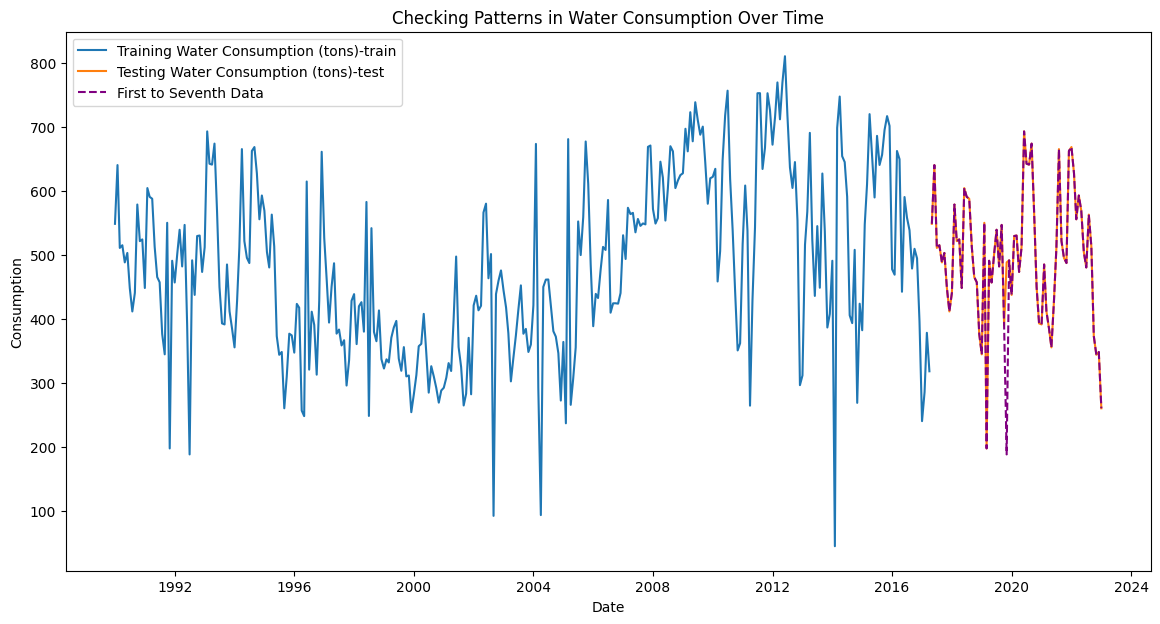

In [218]:
# Define the number of months to forecast
forecast_period = 69

# Split the data into training and testing sets
train_water = data[:-forecast_period]
test_gas = data[-forecast_period:]

plt.figure(figsize=(14, 7))
plt.plot(train_water['Water Consumption (tons)'], label='Training Water Consumption (tons)-train')
plt.plot(test_gas['Water Consumption (tons)'], label='Testing Water Consumption (tons)-test')
# get the data I want to check if there is duplicate
test_gas.loc[:,['Water Consumption (tons)- test']]= train_water.loc[:,['Water Consumption (tons)']].iloc[0:69].values 
plt.plot(test_gas['Water Consumption (tons)- test'] , label='First to Seventh Data', linestyle='dashed', color='purple')
plt.title('Checking Patterns in Water Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Consumption')
plt.legend()
plt.show()

# Split Data into Training and Testing Sets
Split the dataset into training and testing sets for model evaluation.

Training set shape: (337, 4)
Testing set shape: (60, 4)


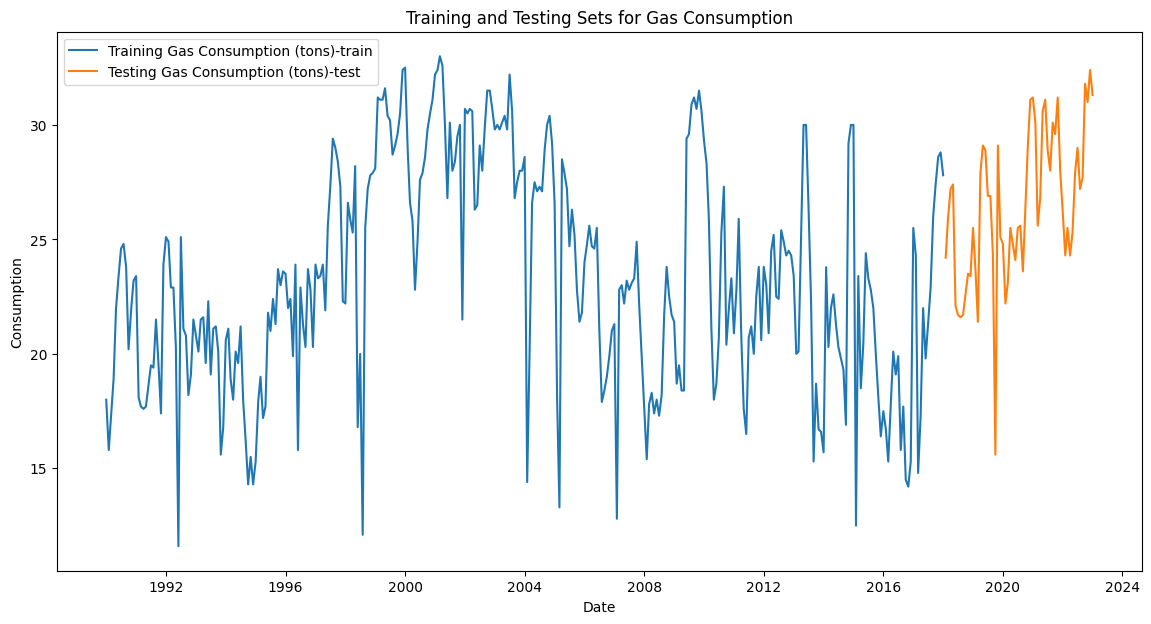

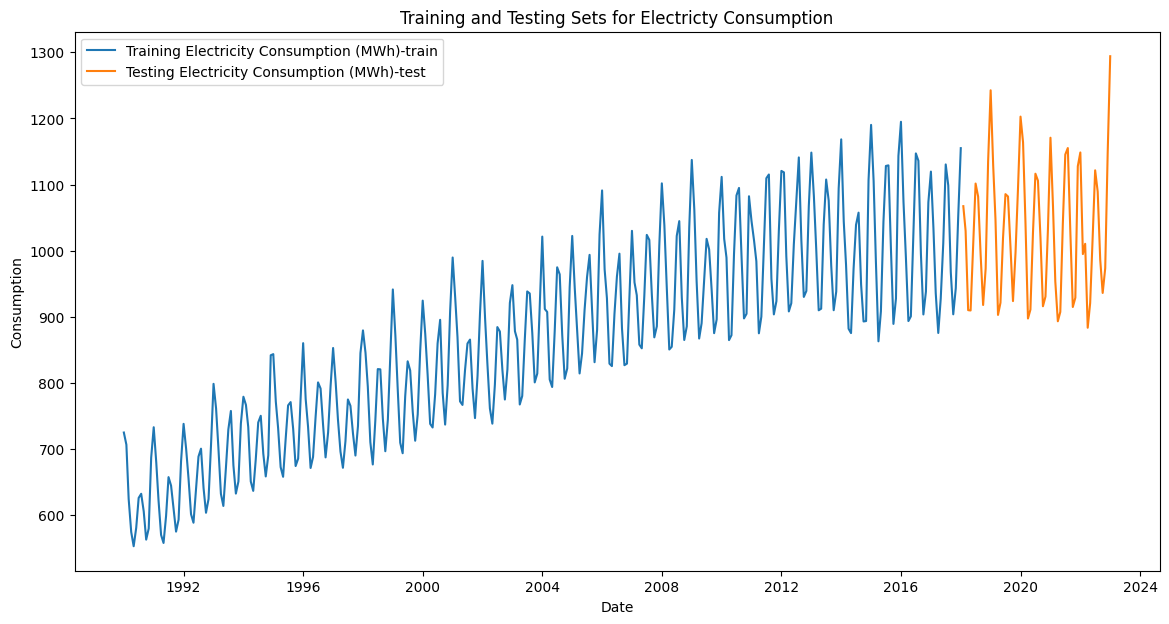

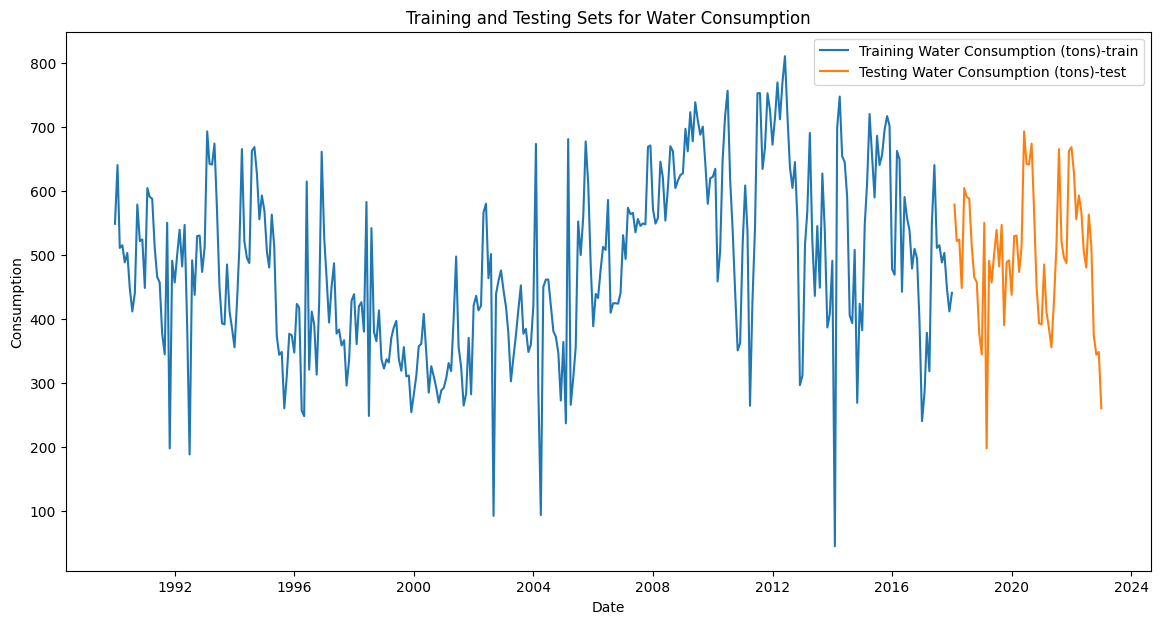

In [219]:
# Split Data into Training and Testing Sets

# Define the number of months to forecast
forecast_period = 60

# Split the data into training and testing sets
train_data = data[:-forecast_period]
test_data = data[-forecast_period:]

# Display the shapes of the training and testing sets
print("Training set shape:", train_data.shape)
print("Testing set shape:", test_data.shape)

# Plot the training and testing sets
plt.figure(figsize=(14, 7))
plt.plot(train_data['Gas Consumption (tons)'], label='Training Gas Consumption (tons)-train')
plt.plot(test_data['Gas Consumption (tons)'], label='Testing Gas Consumption (tons)-test')
plt.title('Training and Testing Sets for Gas Consumption')
plt.xlabel('Date')
plt.ylabel('Consumption')
plt.legend()
plt.show()
plt.figure(figsize=(14, 7))
plt.plot(train_data['Electricity Consumption (MWh)'], label='Training Electricity Consumption (MWh)-train')
plt.plot(test_data['Electricity Consumption (MWh)'], label='Testing Electricity Consumption (MWh)-test')
plt.title('Training and Testing Sets for Electricty Consumption')
plt.xlabel('Date')
plt.ylabel('Consumption')
plt.legend()
plt.show()
plt.figure(figsize=(14, 7))
plt.plot(train_data['Water Consumption (tons)'], label='Training Water Consumption (tons)-train')
plt.plot(test_data['Water Consumption (tons)'], label='Testing Water Consumption (tons)-test')
plt.title('Training and Testing Sets for Water Consumption')
plt.xlabel('Date')
plt.ylabel('Consumption')
plt.legend()
plt.show()

# Build Time Series Models

### Holt-Winter’s Seasonal Smoothing model

#### Testing

In [220]:
data['Gas Consumption (tons)'] = pd.to_numeric(data['Gas Consumption (tons)'], errors='coerce')
model = ExponentialSmoothing(data['Gas Consumption (tons)'], trend="add", seasonal="add", seasonal_periods=156).fit()

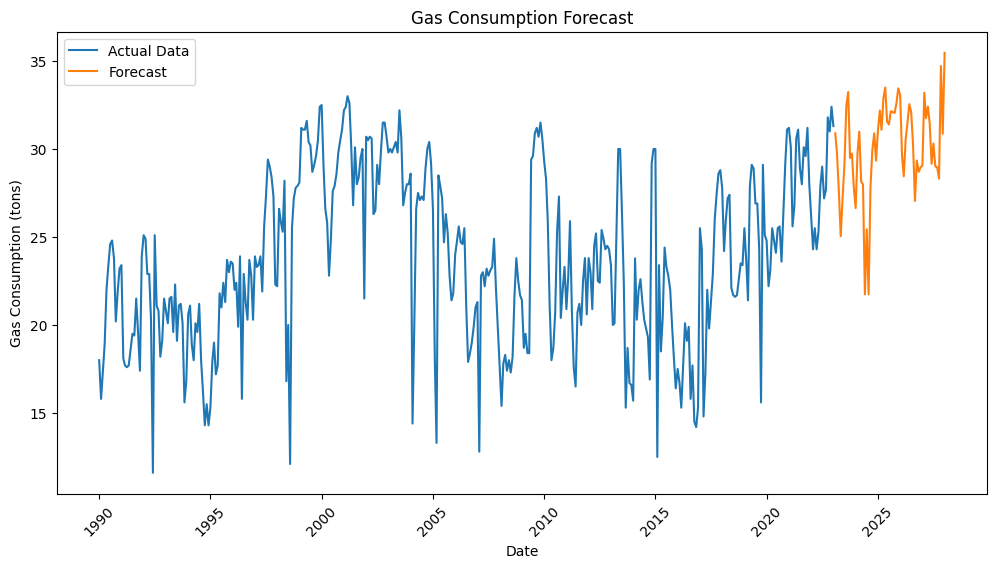

In [221]:
# Forecast the next 30 months
forecast_steps = 60  # 30 months of forecast
forecast = model.forecast(steps=forecast_steps)

# Create a new index for the forecast (starting from the last index in the data)
forecast_index = pd.date_range(start=data.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='MS')

# Plot the original data and forecast
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Gas Consumption (tons)'], label="Actual Data")
plt.plot(forecast_index, forecast, label="Forecast", linestyle="-")
plt.title("Gas Consumption Forecast")
plt.xlabel("Date")
plt.ylabel("Gas Consumption (tons)")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout
plt.show()

This is just testing

### Holt Winders HyperTuning

In [222]:
def tune_holt_winters_model(data, column, train_size_ratio=0.8):
    # Convert the specified column to numeric
    data[column] = pd.to_numeric(data[column], errors='coerce')

    # Split data into train and test sets
    train_size = int(len(data) * train_size_ratio)
    train, test = data[:train_size], data[train_size:]

    # Define hyperparameters to tune
    trends = ['add', 'mul']  # Additive and Multiplicative trend
    seasonals = ['add', 'mul']  # Additive and Multiplicative seasonality
    seasonal_periods = [12 * i for i in range(1, 13)]  # Multiples of 12 for seasonal periods

    # Create a list of all parameter combinations
    param_combinations = list(itertools.product(trends, seasonals, seasonal_periods))

    # Initialize variables to store best results
    best_mape = float('inf')
    best_model = None
    best_params = None

    # Loop over all parameter combinations
    for trend, seasonal, seasonal_period in param_combinations:
        # Fit the model on the training data
        model = ExponentialSmoothing(train[column], 
                                     trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit()
        
        # Forecast the next steps (test set size)
        forecast = model.forecast(steps=len(test))

        # Evaluate model performance with MAPE, MSE, and MAE
        mse = mean_squared_error(test[column], forecast)
        mae = mean_absolute_error(test[column], forecast)
        mape = mean_absolute_percentage_error(test[column], forecast)

        # Check if this combination gives the best MAPE
        if mape < best_mape:
            best_mape = mape
            best_model = model
            best_params = (trend, seasonal, seasonal_period)

    # Print the best parameters and corresponding MAPE
    print(f"\nBest Model: Trend={best_params[0]}, Seasonal={best_params[1]}, Seasonal Period={best_params[2]}")
    print(f"Best MAPE: {best_mape * 100}%")


# Best Params For Gas Consumption
tune_holt_winters_model(data, 'Gas Consumption (tons)')


C:\Users\kaung\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\kaung\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\kaung\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\kaung\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\holtwinters\model.py:918: Convergen


Best Model: Trend=add, Seasonal=add, Seasonal Period=96
Best MAPE: 19.181146349190143%


C:\Users\kaung\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [223]:
# Best Params For Gas Consumption
tune_holt_winters_model(data, 'Electricity Consumption (MWh)')

C:\Users\kaung\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\kaung\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\kaung\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\kaung\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\holtwinters\model.py:918: Convergen


Best Model: Trend=add, Seasonal=add, Seasonal Period=36
Best MAPE: 2.7566469514876086%


C:\Users\kaung\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [224]:
# Best Params For Gas Consumption
tune_holt_winters_model(data, 'Water Consumption (tons)')

C:\Users\kaung\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\kaung\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\kaung\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\kaung\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users


Best Model: Trend=add, Seasonal=add, Seasonal Period=108
Best MAPE: 18.51959655853056%


C:\Users\kaung\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\kaung\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


**Gas Consumption**\
Best Model: Trend=add, Seasonal=add, Seasonal Period=96\
Best MAPE: 19.181146349190143%

**Electricty Consumption**\
Best Model: Trend=add, Seasonal=add, Seasonal Period=36\
Best MAPE: 2.7566469514876086%

**Water Consumption**\
Best Model: Trend=add, Seasonal=add, Seasonal Period=108\
Best MAPE: 18.51959655853056%

### Evaluating Holt Winter Model Performance

MSE: 30.63465040646696
MAE: 4.724986014999239
MAPE: 19.181146349190143%


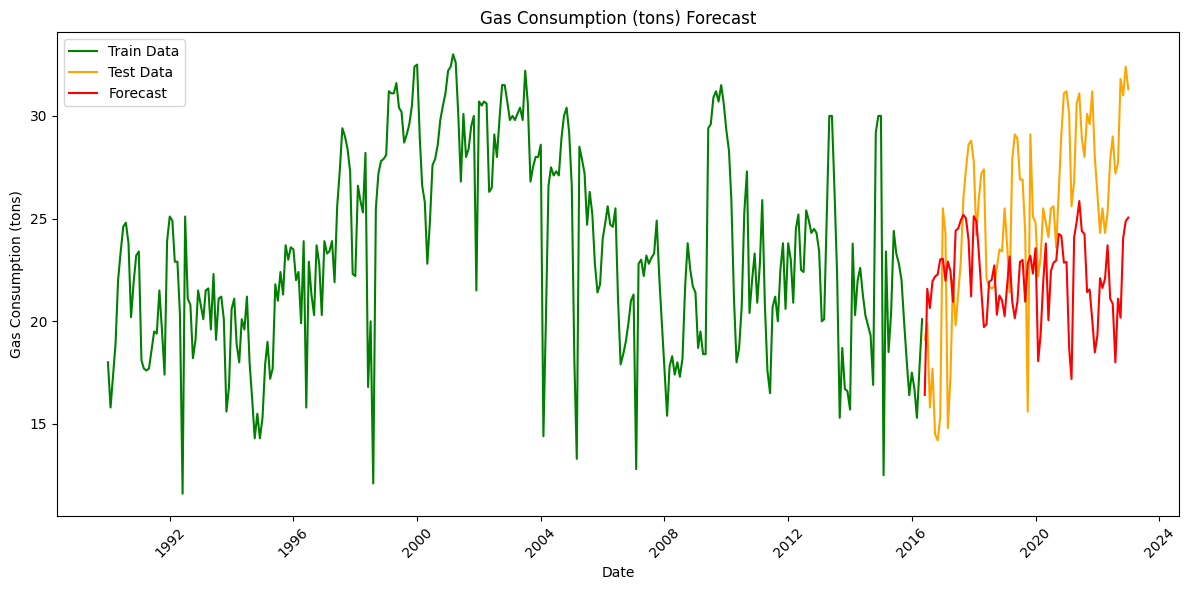

In [225]:
def forecast_consumption(data, column, train_size_ratio=0.8, seasonal_periods=12, forecast_steps=60, trend='add', seasonal='add'):
    train_size = int(len(data) * train_size_ratio)
    train, test = data[:train_size], data[train_size:]

    # Fit the model on the training data
    model = ExponentialSmoothing(train[column], trend=trend, seasonal=seasonal, seasonal_periods=seasonal_periods).fit()

    # Forecast the next steps (test set size)
    forecast = model.forecast(steps=len(test))
    future_forecast = model.forecast(steps=len(test) + forecast_steps)

    # Evaluate model performance with MAPE, MSE, and MAE
    mse = mean_squared_error(test[column], forecast)
    mae = mean_absolute_error(test[column], forecast)
    mape = mean_absolute_percentage_error(test[column], forecast)

    # Print the scoring metrics
    print(f'MSE: {mse}')
    print(f'MAE: {mae}')
    print(f'MAPE: {mape * 100}%')

    # Create a new index for the forecast (starting from the last index in the train set)
    forecast_index = pd.date_range(start=train.index[-1] + pd.DateOffset(months=1), periods=len(test), freq='MS')

    # Plot the original data, training data, test data, and forecast
    plt.figure(figsize=(12, 6))
    plt.plot(train.index, train[column], label="Train Data", color='green')
    plt.plot(test.index, test[column], label="Test Data", color='orange')
    plt.plot(forecast_index, forecast, label="Forecast", linestyle="-", color='red')
    plt.title(f"{column} Forecast")
    plt.xlabel("Date")
    plt.ylabel(column)
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Call the function
forecast_consumption(data, 'Gas Consumption (tons)', seasonal_periods=96, trend='add', seasonal='add')


MSE: 1478.171747213942
MAE: 28.93158463623655
MAPE: 2.7566469514876086%


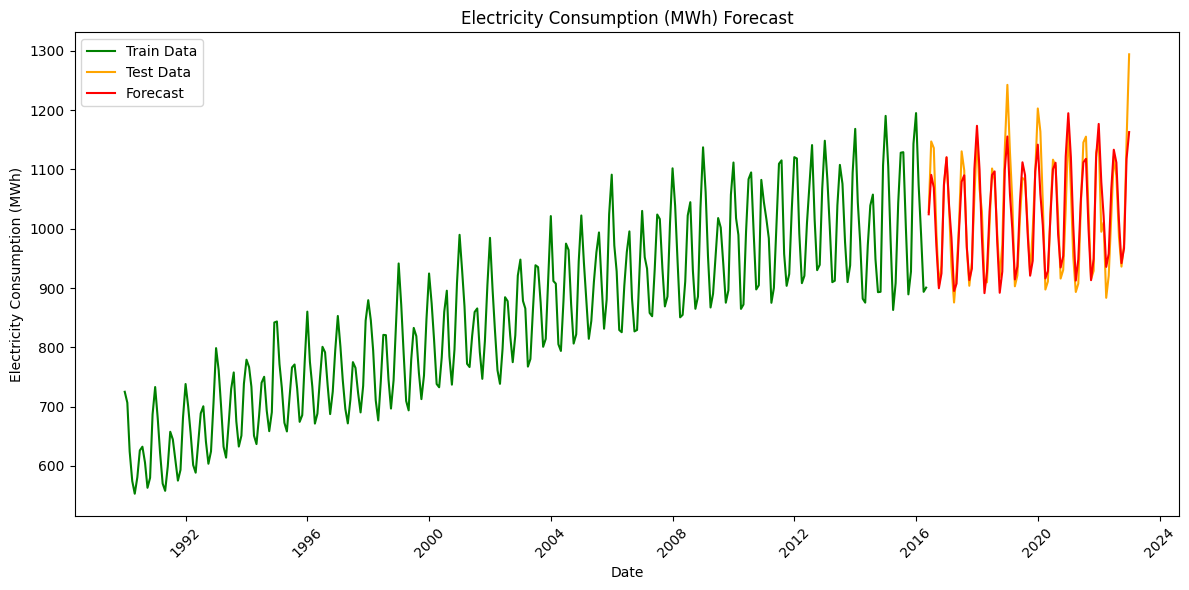

In [226]:
# Electric Consumption
forecast_consumption(data, 'Electricity Consumption (MWh)', seasonal_periods=36, trend='add', seasonal='add')

MSE: 10675.922245556716
MAE: 81.85769382101815
MAPE: 18.51959655853056%


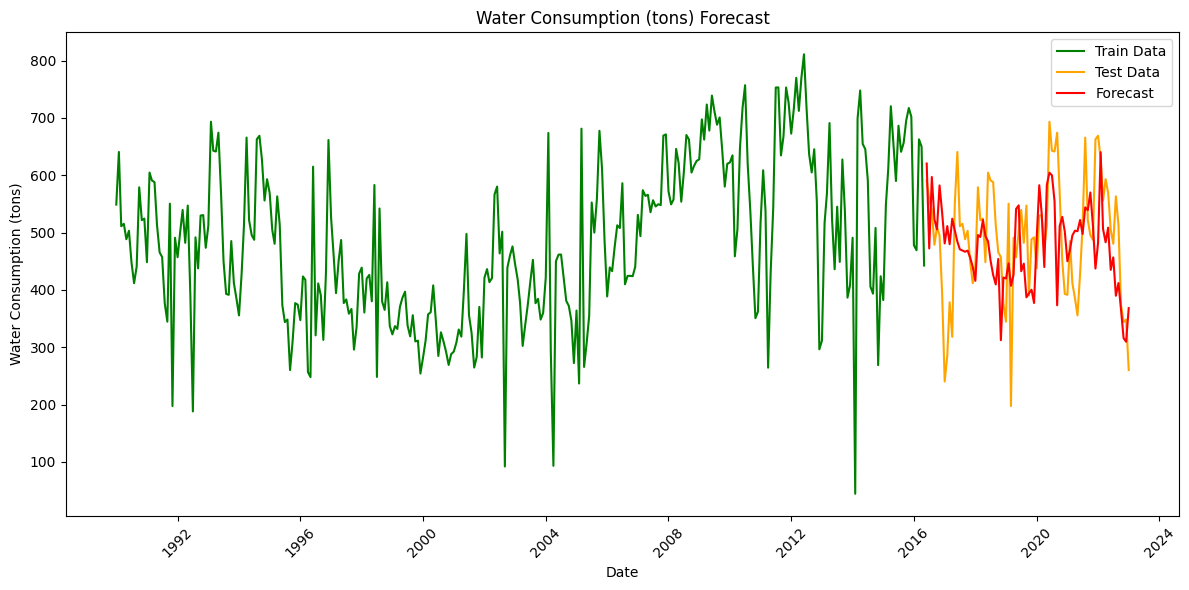

In [227]:
# Water Consumption
forecast_consumption(data, 'Water Consumption (tons)', seasonal_periods=108, trend='add', seasonal='add')

### Forecasting Holt Winter Models

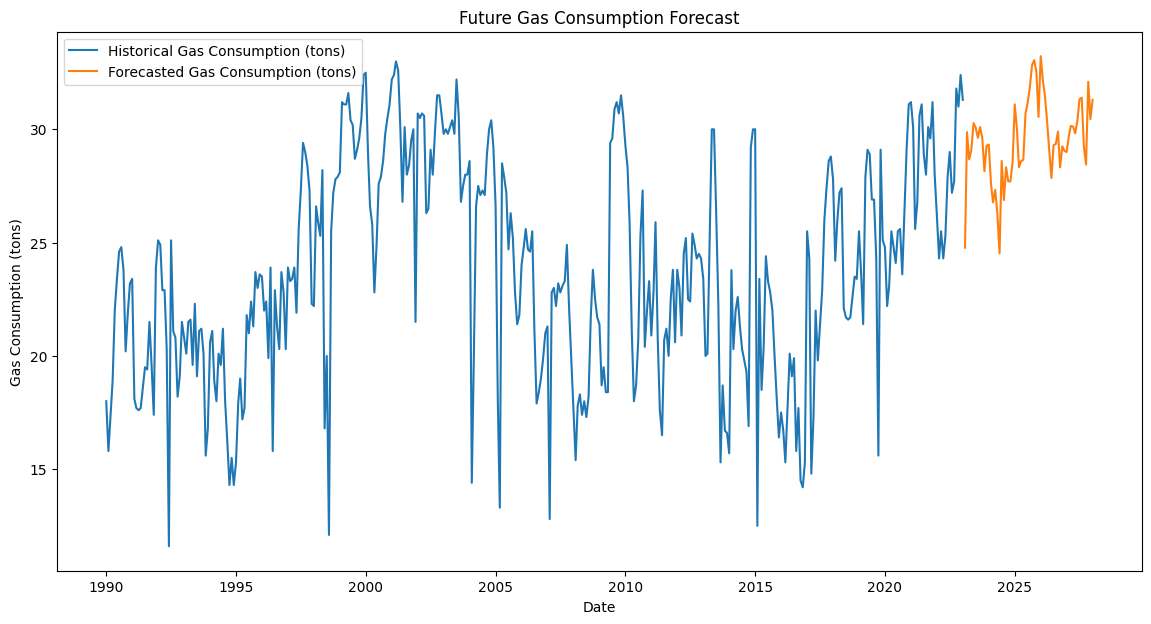

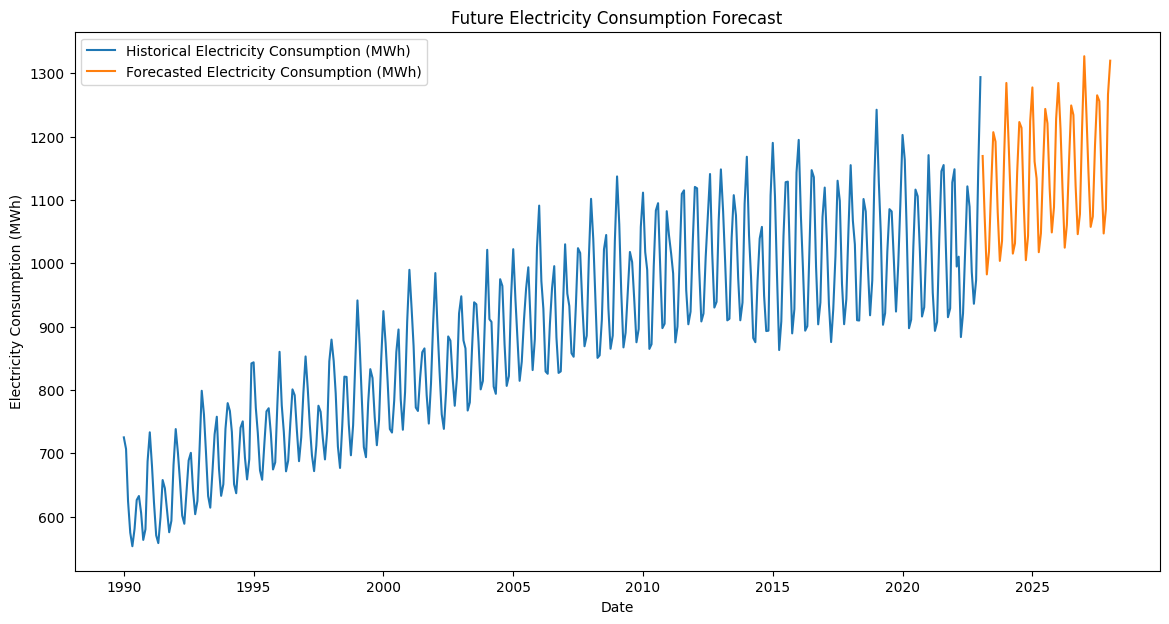

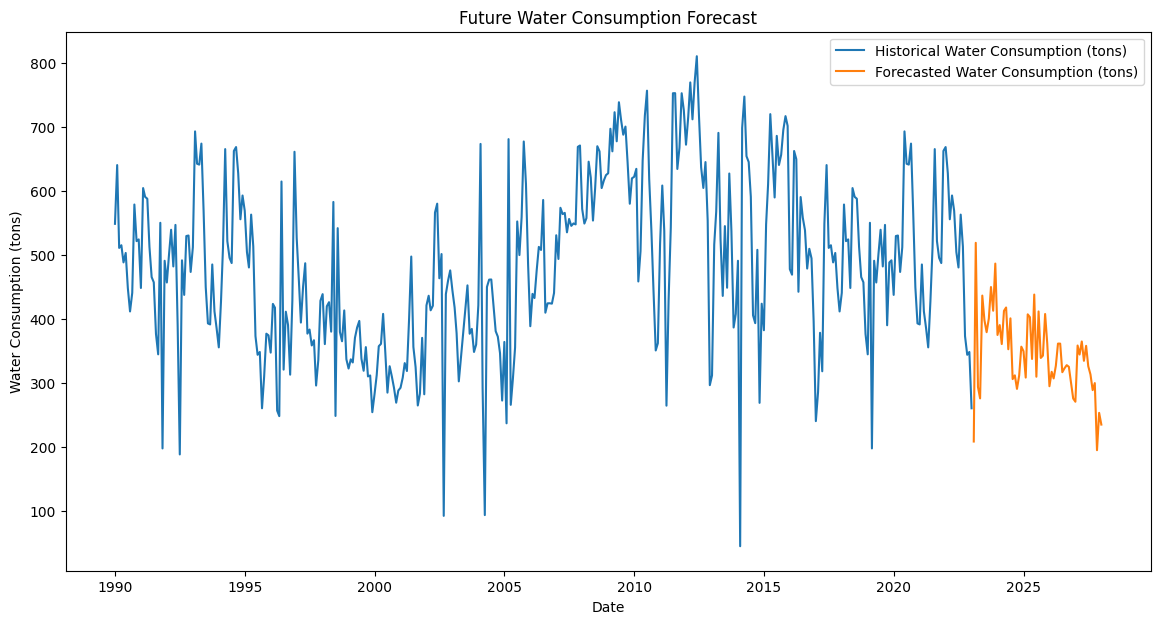

In [228]:
# Forecast Future Consumption for Gas, Electricity, and Water
best_gas_hw_model_fit = ExponentialSmoothing(data['Gas Consumption (tons)'], trend='add', seasonal='add', seasonal_periods=96).fit()
best_electricity_hw_model_fit = ExponentialSmoothing(data['Electricity Consumption (MWh)'], trend='add', seasonal='add', seasonal_periods=36).fit()
best_water_hw_model_fit = ExponentialSmoothing(data['Water Consumption (tons)'], trend='add', seasonal='add', seasonal_periods=108).fit()
# Forecast Gas Consumption with tuned parameters
future_gas_forecast = best_gas_hw_model_fit.forecast(steps=60)
future_gas_forecast = pd.Series(future_gas_forecast, index=pd.date_range(start=data.index[-1] + pd.DateOffset(months=1), periods=60, freq='MS'))

# Forecast Electricity Consumption with tuned parameters
future_electricity_forecast = best_electricity_hw_model_fit.forecast(steps=60)
future_electricity_forecast = pd.Series(future_electricity_forecast, index=pd.date_range(start=data.index[-1] + pd.DateOffset(months=1), periods=60, freq='MS'))

# Forecast Water Consumption with tuned parameters
future_water_forecast = best_water_hw_model_fit.forecast(steps=60)
future_water_forecast = pd.Series(future_water_forecast, index=pd.date_range(start=data.index[-1] + pd.DateOffset(months=1), periods=60, freq='MS'))

# Plot the future forecasts
plt.figure(figsize=(14, 7))
plt.plot(data['Gas Consumption (tons)'], label='Historical Gas Consumption (tons)')
plt.plot(future_gas_forecast, label='Forecasted Gas Consumption (tons)')
plt.title('Future Gas Consumption Forecast')
plt.xlabel('Date')
plt.ylabel('Gas Consumption (tons)')
plt.legend()
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(data['Electricity Consumption (MWh)'], label='Historical Electricity Consumption (MWh)')
plt.plot(future_electricity_forecast, label='Forecasted Electricity Consumption (MWh)')
plt.title('Future Electricity Consumption Forecast')
plt.xlabel('Date')
plt.ylabel('Electricity Consumption (MWh)')
plt.legend()
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(data['Water Consumption (tons)'], label='Historical Water Consumption (tons)')
plt.plot(future_water_forecast, label='Forecasted Water Consumption (tons)')
plt.title('Future Water Consumption Forecast')
plt.xlabel('Date')
plt.ylabel('Water Consumption (tons)')
plt.legend()
plt.show()

### Building Default SARIMAX Model

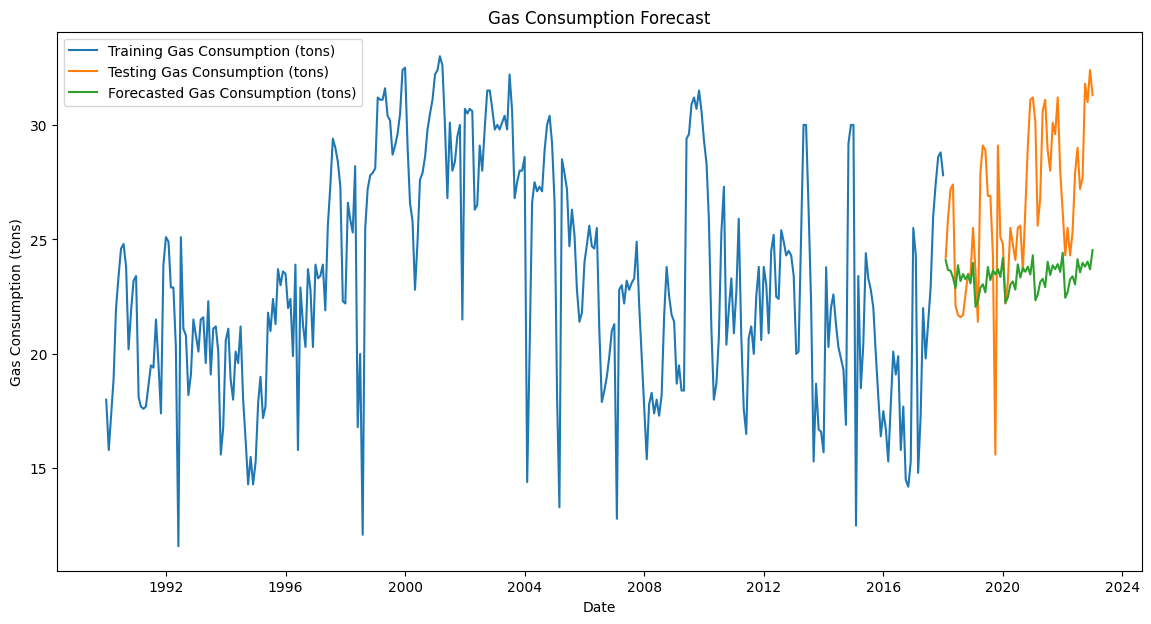

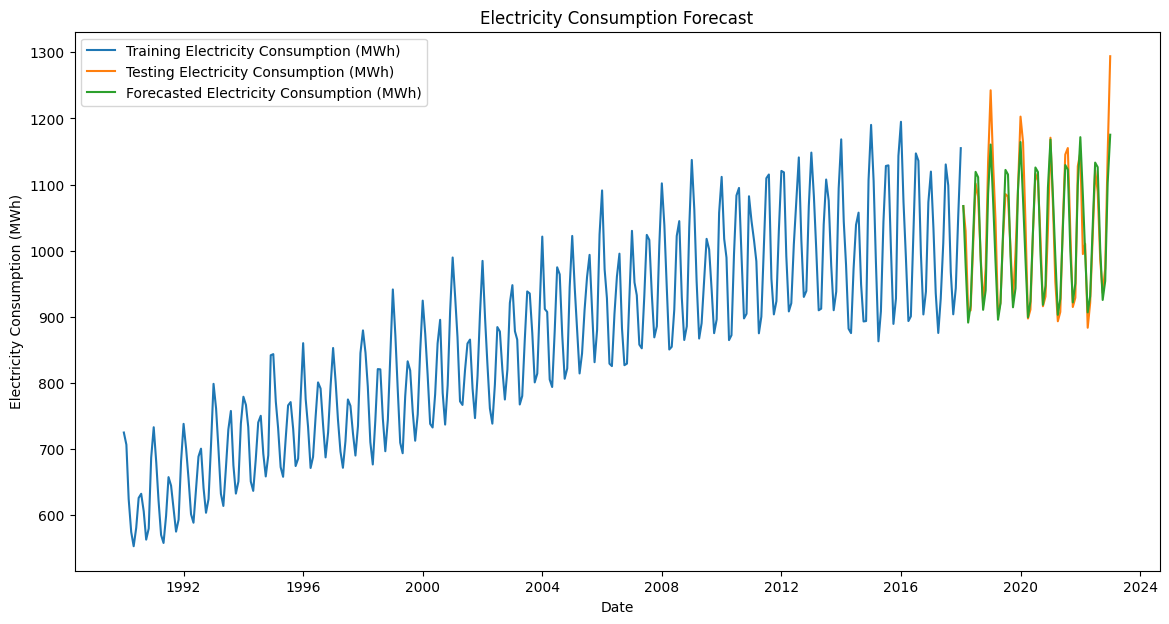

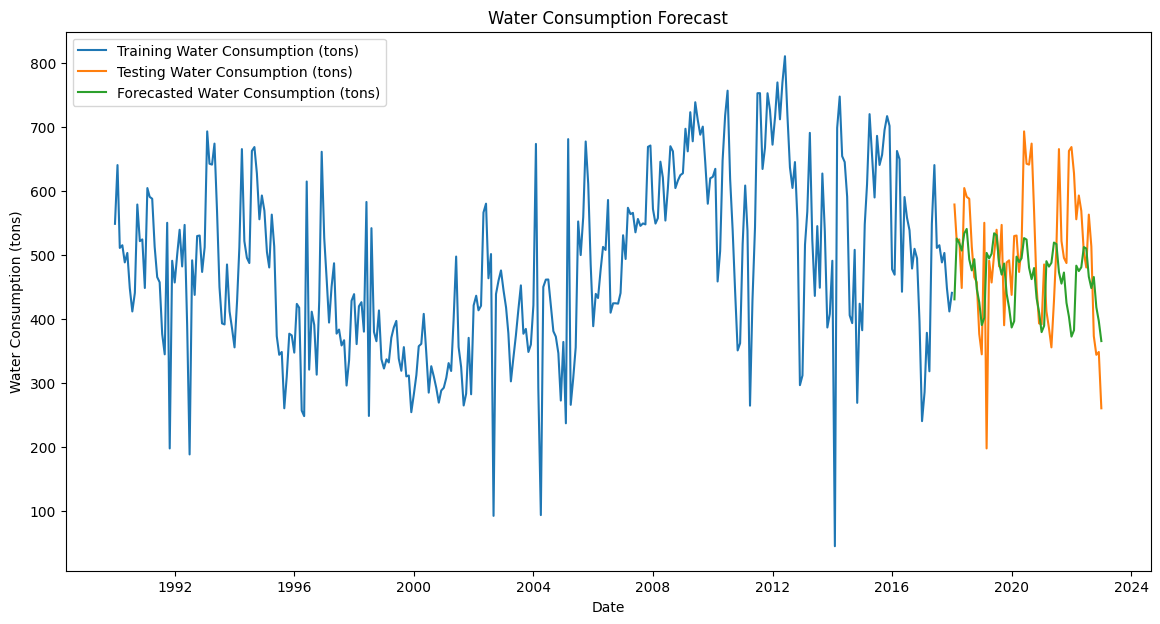

In [229]:
# Build Time Series Models

# Build and fit the SARIMA model for Gas Consumption
gas_model = sm.tsa.SARIMAX(train_data['Gas Consumption (tons)'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
gas_model_fit = gas_model.fit(disp=False)

# Forecast Gas Consumption
gas_forecast = gas_model_fit.forecast(steps=forecast_period)
gas_forecast = pd.Series(gas_forecast, index=test_data.index)

# Plot the Gas Consumption forecast
plt.figure(figsize=(14, 7))
plt.plot(train_data['Gas Consumption (tons)'], label='Training Gas Consumption (tons)')
plt.plot(test_data['Gas Consumption (tons)'], label='Testing Gas Consumption (tons)')
plt.plot(gas_forecast, label='Forecasted Gas Consumption (tons)')
plt.title('Gas Consumption Forecast')
plt.xlabel('Date')
plt.ylabel('Gas Consumption (tons)')
plt.legend()
plt.show()

# Build and fit the SARIMA model for Electricity Consumption
electricity_model = sm.tsa.SARIMAX(train_data['Electricity Consumption (MWh)'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
electricity_model_fit = electricity_model.fit(disp=False)

# Forecast Electricity Consumption
electricity_forecast = electricity_model_fit.forecast(steps=forecast_period)
electricity_forecast = pd.Series(electricity_forecast, index=test_data.index)

# Plot the Electricity Consumption forecast
plt.figure(figsize=(14, 7))
plt.plot(train_data['Electricity Consumption (MWh)'], label='Training Electricity Consumption (MWh)')
plt.plot(test_data['Electricity Consumption (MWh)'], label='Testing Electricity Consumption (MWh)')
plt.plot(electricity_forecast, label='Forecasted Electricity Consumption (MWh)')
plt.title('Electricity Consumption Forecast')
plt.xlabel('Date')
plt.ylabel('Electricity Consumption (MWh)')
plt.legend()
plt.show()

# Build and fit the SARIMA model for Water Consumption
water_model = sm.tsa.SARIMAX(train_data['Water Consumption (tons)'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
water_model_fit = water_model.fit(disp=False)

# Forecast Water Consumption
water_forecast = water_model_fit.forecast(steps=forecast_period)
water_forecast = pd.Series(water_forecast, index=test_data.index)

# Plot the Water Consumption forecast
plt.figure(figsize=(14, 7))
plt.plot(train_data['Water Consumption (tons)'], label='Training Water Consumption (tons)')
plt.plot(test_data['Water Consumption (tons)'], label='Testing Water Consumption (tons)')
plt.plot(water_forecast, label='Forecasted Water Consumption (tons)')
plt.title('Water Consumption Forecast')
plt.xlabel('Date')
plt.ylabel('Water Consumption (tons)')
plt.legend()
plt.show()

### HyperParameters Tuning using MSE as Metrics

In [230]:
# Define the parameter ranges for SARIMA
p = d = q = range(0, 3)
seasonal_p = seasonal_d = seasonal_q = range(0, 3)
seasonal_period = [12]

# Generate all combinations of parameters
parameters = list(product(p, d, q))
seasonal_parameters = list(product(seasonal_p, seasonal_d, seasonal_q, seasonal_period))

# Function to evaluate SARIMA model
def evaluate_sarima_model_mse(train_data, test_data, param, seasonal_param, column):
    model = sm.tsa.SARIMAX(train_data[column], order=param, seasonal_order=seasonal_param, enforce_stationarity=False, enforce_invertibility=False)
    model_fit = model.fit(disp=False)
    forecast = model_fit.forecast(steps=len(test_data))
    mse = ((forecast - test_data[column]) ** 2).mean()
    return mse

# commented since take too long to run (around 1 hour) using MSE as evaluation metric

# Tune hyperparameters for Gas Consumption
# best_score, best_params, best_seasonal_params = float("inf"), None, None
# for param in parameters:
#     for seasonal_param in seasonal_parameters:
#         try:
#             mse = evaluate_sarima_model_mse(train_data, test_data, param, seasonal_param, 'Gas Consumption (tons)')
#             if mse < best_score:
#                 best_score, best_params, best_seasonal_params = mse, param, seasonal_param
#         except:
#             continue

# print(f'Best SARIMA parameters for Gas Consumption: {best_params} x {best_seasonal_params} with MSE: {best_score}')

# # Tune hyperparameters for Electricity Consumption
# best_score, best_params, best_seasonal_params = float("inf"), None, None
# for param in parameters:
#     for seasonal_param in seasonal_parameters:
#         try:
#             mse = evaluate_sarima_model_mse(train_data, test_data, param, seasonal_param, 'Electricity Consumption (MWh)')
#             if mse < best_score:
#                 best_score, best_params, best_seasonal_params = mse, param, seasonal_param
#         except:
#             continue

# print(f'Best SARIMA parameters for Electricity Consumption: {best_params} x {best_seasonal_params} with MSE: {best_score}')

# # Tune hyperparameters for Water Consumption
# best_score, best_params, best_seasonal_params = float("inf"), None, None
# for param in parameters:
#     for seasonal_param in seasonal_parameters:
#         try:
#             mse = evaluate_sarima_model_mse(train_data, test_data, param, seasonal_param, 'Water Consumption (tons)')
#             if mse < best_score:
#                 best_score, best_params, best_seasonal_params = mse, param, seasonal_param
#         except:
#             continue

# print(f'Best SARIMA parameters for Water Consumption: {best_params} x {best_seasonal_params} with MSE: {best_score}')

Best SARIMA parameters for Gas Consumption: (1, 2, 2) x (0, 2, 2, 12) with MSE: 7.285027844048981 \
Best SARIMA parameters for Electricity Consumption: (2, 0, 2) x (2, 1, 1, 12) with MSE: 1203.0595085534567 \
Best SARIMA parameters for Water Consumption: (0, 1, 0) x (2, 1, 2, 12) with MSE: 10097.650641867864

### HyperParameters Tuning using MAPE as Metrics

In [231]:
# Function to evaluate SARIMA model

def evaluate_sarima_model_mape(train_data, test_data, param, seasonal_param, column):
    model = sm.tsa.SARIMAX(train_data[column], order=param, seasonal_order=seasonal_param, enforce_stationarity=False, enforce_invertibility=False)
    model_fit = model.fit(disp=False)
    forecast = model_fit.forecast(steps=len(test_data))
    mape = (abs((forecast - test_data[column]) / test_data[column])).mean() * 100
    return mape

# # Tune hyperparameters for Gas Consumption
# best_score, best_params, best_seasonal_params = float("inf"), None, None
# for param in parameters:
#     for seasonal_param in seasonal_parameters:
#         try:
#             mape = evaluate_sarima_model_mape(train_data, test_data, param, seasonal_param, 'Gas Consumption (tons)')
#             if mape < best_score:
#                 best_score, best_params, best_seasonal_params = mape, param, seasonal_param
#         except:
#             continue

# print(f'Best SARIMA parameters for Gas Consumption: {best_params} x {best_seasonal_params} with MAPE: {best_score}')

# # Tune hyperparameters for Electricity Consumption
# best_score, best_params, best_seasonal_params = float("inf"), None, None
# for param in parameters:
#     for seasonal_param in seasonal_parameters:
#         try:
#             mape = evaluate_sarima_model_mape(train_data, test_data, param, seasonal_param, 'Electricity Consumption (MWh)')
#             if mape < best_score:
#                 best_score, best_params, best_seasonal_params = mape, param, seasonal_param
#         except:
#             continue

# print(f'Best SARIMA parameters for Electricity Consumption: {best_params} x {best_seasonal_params} with MAPE: {best_score}')

# # Tune hyperparameters for Water Consumption
# best_score, best_params, best_seasonal_params = float("inf"), None, None
# for param in parameters:
#     for seasonal_param in seasonal_parameters:
#         try:
#             mape = evaluate_sarima_model_mape(train_data, test_data, param, seasonal_param, 'Water Consumption (tons)')
#             if mape < best_score:
#                 best_score, best_params, best_seasonal_params = mape, param, seasonal_param
#         except:
#             continue

# print(f'Best SARIMA parameters for Water Consumption: {best_params} x {best_seasonal_params} with MAPE: {best_score}')


Best SARIMA parameters for Gas Consumption: (1, 2, 2) x (0, 2, 2, 12) with MAPE: 8.655214815584984\
Best SARIMA parameters for Electricity Consumption: (2, 0, 2) x (2, 1, 1, 12) with MAPE: 2.385556834073168\
Best SARIMA parameters for Water Consumption: (0, 1, 0) x (2, 1, 2, 12) with MAPE: 17.177309728593332

Using both MSE and MAPE metrics give the same results, therefore we can confirmed that these are the best parameters for forecasting Energy Consumption.

# Evaluate Model Performance
Evaluate the performance of the models using appropriate metrics and visualizations.

In [232]:
# Build and fit the SARIMA model for Gas Consumption
gas_model = sm.tsa.SARIMAX(train_data['Gas Consumption (tons)'], order=(1, 2, 2), seasonal_order=(0, 2, 2, 12))
gas_model_fit = gas_model.fit(disp=False)

# Forecast Gas Consumption
gas_forecast = gas_model_fit.forecast(steps=forecast_period)
gas_forecast = pd.Series(gas_forecast, index=test_data.index)

# Build and fit the SARIMA model for Electricity Consumption
electricity_model = sm.tsa.SARIMAX(train_data['Electricity Consumption (MWh)'], order=(2, 0, 2), seasonal_order=(2, 1, 1, 12))
electricity_model_fit = electricity_model.fit(disp=False)

# Forecast Electricity Consumption
electricity_forecast = electricity_model_fit.forecast(steps=forecast_period)
electricity_forecast = pd.Series(electricity_forecast, index=test_data.index)

# Build and fit the SARIMA model for Water Consumption
water_model = sm.tsa.SARIMAX(train_data['Water Consumption (tons)'], order=(0, 1, 0), seasonal_order=(2, 1, 2, 12))
water_model_fit = water_model.fit(disp=False)

# Forecast Water Consumption
water_forecast = water_model_fit.forecast(steps=forecast_period)
water_forecast = pd.Series(water_forecast, index=test_data.index)

Gas Consumption Model - MSE: 66.21199936980082, MAE: 6.584915719001231, MAPE: 24.920%
Electricity Consumption Model - MSE: 1290.3852631539785, MAE: 26.007043972197092, MAPE: 2.44%
Water Consumption Model - MSE: 10871.1232784526, MAE: 81.58999647181372, MAPE: 17.5%


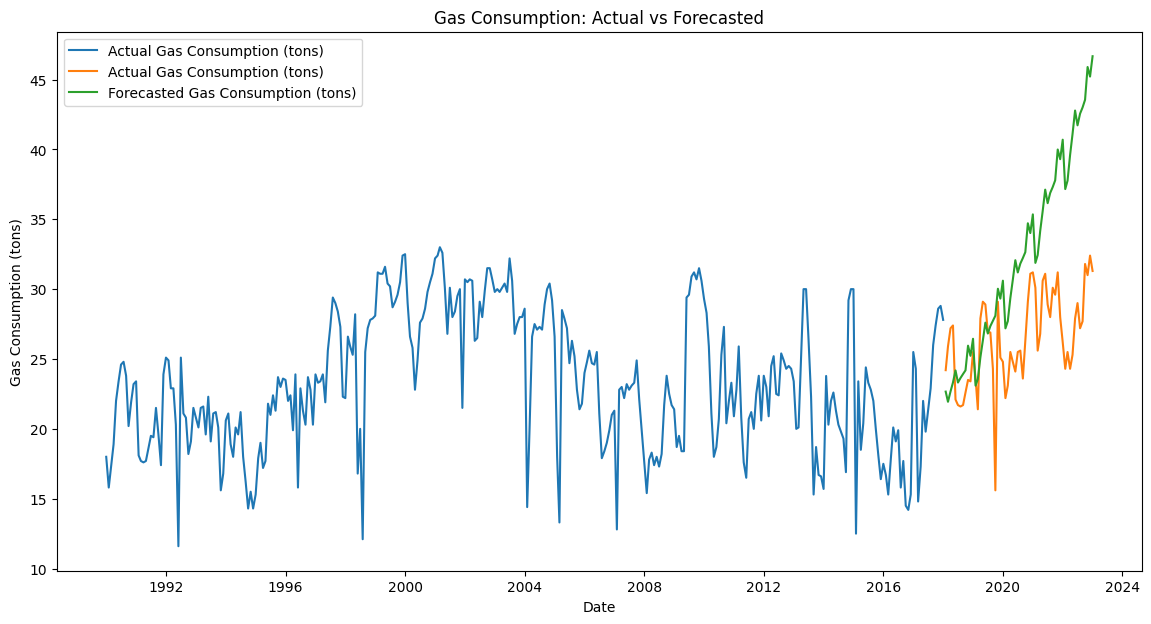

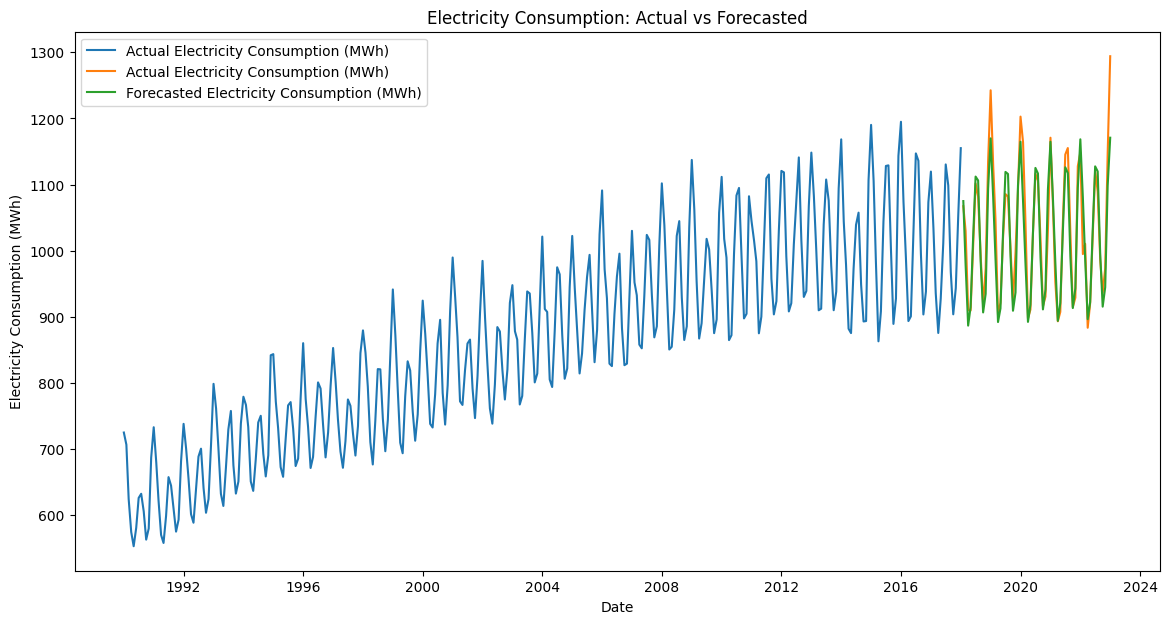

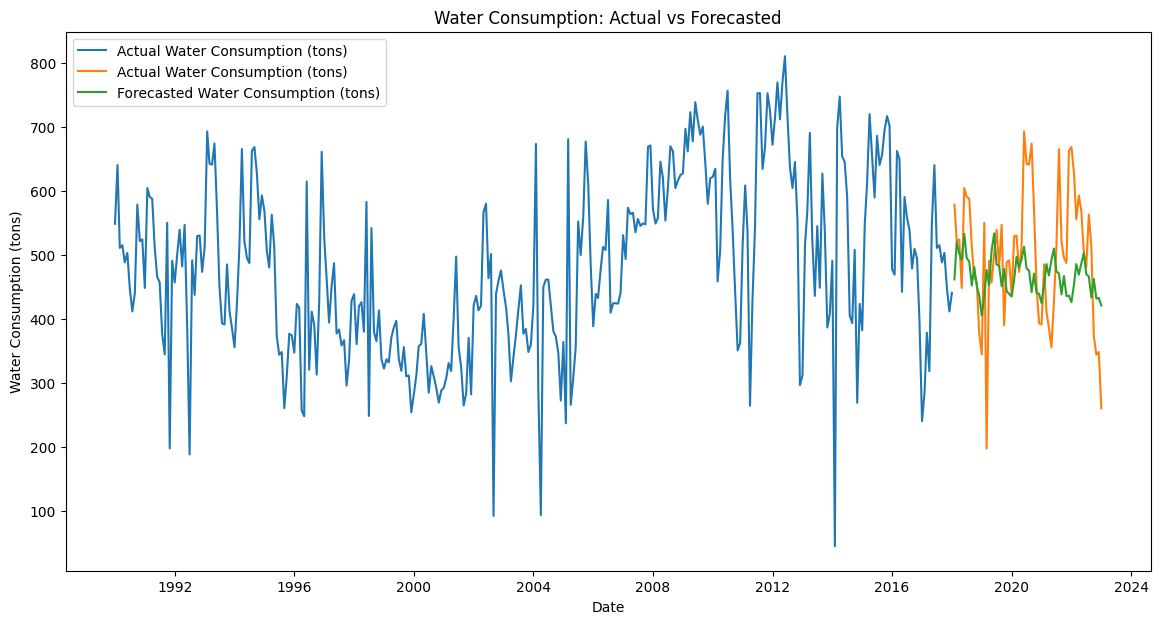

In [233]:

# Evaluate Gas Consumption Model
gas_mse = mean_squared_error(test_data['Gas Consumption (tons)'], gas_forecast)
gas_mae = mean_absolute_error(test_data['Gas Consumption (tons)'], gas_forecast)
gas_mape = mean_absolute_percentage_error(test_data['Gas Consumption (tons)'], gas_forecast)
print(f'Gas Consumption Model - MSE: {gas_mse}, MAE: {gas_mae}, MAPE: {(gas_mape*100):.3f}%')

# Evaluate Electricity Consumption Model
electricity_mse = mean_squared_error(test_data['Electricity Consumption (MWh)'], electricity_forecast)
electricity_mae = mean_absolute_error(test_data['Electricity Consumption (MWh)'], electricity_forecast)
electricity_mape = mean_absolute_percentage_error(test_data['Electricity Consumption (MWh)'], electricity_forecast)
print(f'Electricity Consumption Model - MSE: {electricity_mse}, MAE: {electricity_mae}, MAPE: {(electricity_mape*100):.3}%')

# Evaluate Water Consumption Model
water_mse = mean_squared_error(test_data['Water Consumption (tons)'], water_forecast)
water_mae = mean_absolute_error(test_data['Water Consumption (tons)'], water_forecast)
water_mape = mean_absolute_percentage_error(test_data['Water Consumption (tons)'], water_forecast)
print(f'Water Consumption Model - MSE: {water_mse}, MAE: {water_mae}, MAPE: {(water_mape*100):.3}%')

# Plot the forecast vs actuals for Gas Consumption
plt.figure(figsize=(14, 7))
plt.plot(train_data['Gas Consumption (tons)'], label='Actual Gas Consumption (tons)')
plt.plot(test_data['Gas Consumption (tons)'], label='Actual Gas Consumption (tons)')
plt.plot(gas_forecast, label='Forecasted Gas Consumption (tons)')
plt.title('Gas Consumption: Actual vs Forecasted')
plt.xlabel('Date')
plt.ylabel('Gas Consumption (tons)')
plt.legend()
plt.show()

# Plot the forecast vs actuals for Electricity Consumption
plt.figure(figsize=(14, 7))
plt.plot(train_data['Electricity Consumption (MWh)'], label='Actual Electricity Consumption (MWh)')
plt.plot(test_data['Electricity Consumption (MWh)'], label='Actual Electricity Consumption (MWh)')
plt.plot(electricity_forecast, label='Forecasted Electricity Consumption (MWh)')
plt.title('Electricity Consumption: Actual vs Forecasted')
plt.xlabel('Date')
plt.ylabel('Electricity Consumption (MWh)')
plt.legend()
plt.show()

# Plot the forecast vs actuals for Water Consumption
plt.figure(figsize=(14, 7))
plt.plot(train_data['Water Consumption (tons)'], label='Actual Water Consumption (tons)')
plt.plot(test_data['Water Consumption (tons)'], label='Actual Water Consumption (tons)')
plt.plot(water_forecast, label='Forecasted Water Consumption (tons)')
plt.title('Water Consumption: Actual vs Forecasted')
plt.xlabel('Date')
plt.ylabel('Water Consumption (tons)')
plt.legend()
plt.show()

# Forecast Future Consumption

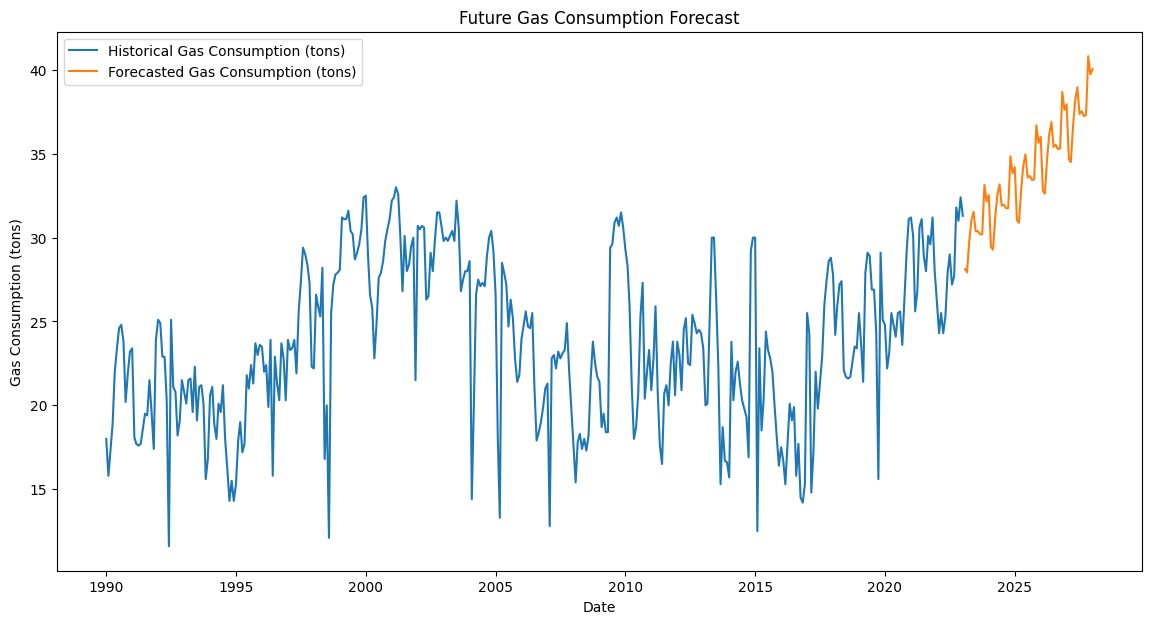

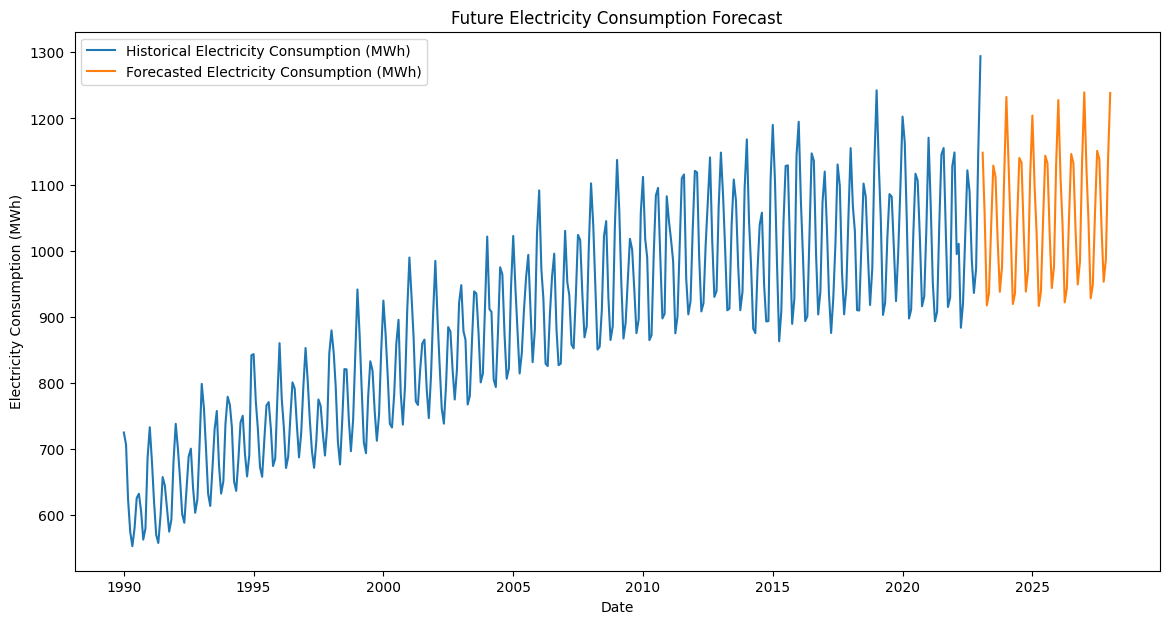

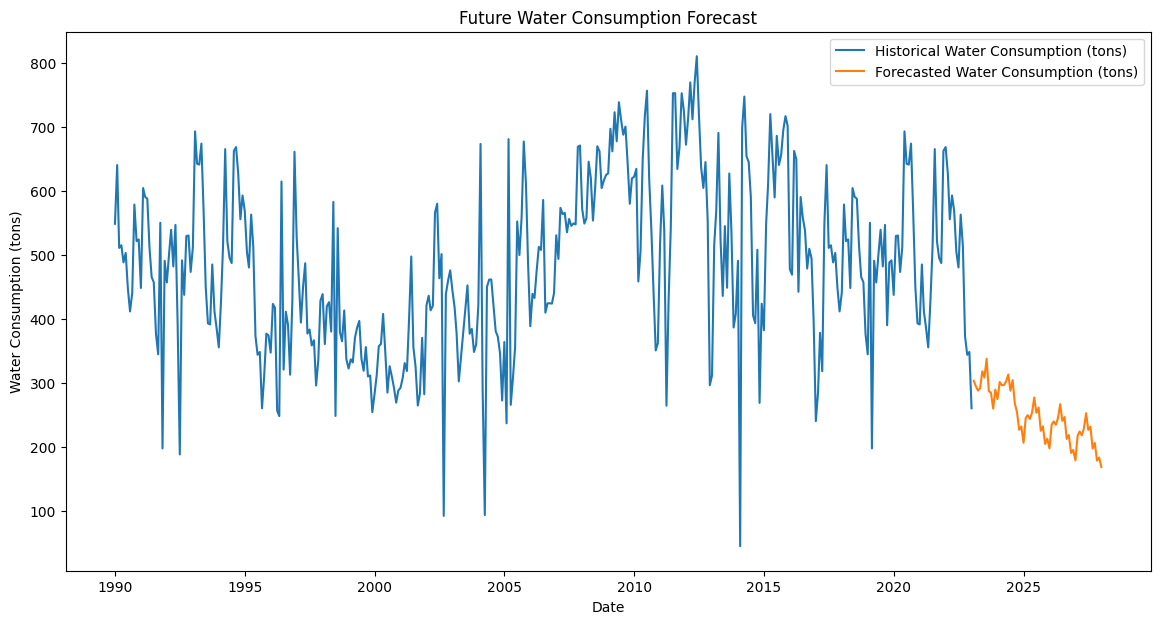

In [234]:
# Forecast Future Consumption

# Use the best SARIMA parameters to forecast future consumption for the next 60 months
data.index = pd.to_datetime(data.index)
# Forecast Gas Consumption with tuned parameters
best_gas_model = sm.tsa.SARIMAX(data['Gas Consumption (tons)'], order=(1, 2, 2), seasonal_order=(0, 2, 2, 12))
best_gas_model_fit = best_gas_model.fit(disp=False)
future_gas_forecast = best_gas_model_fit.forecast(steps=60)
future_gas_forecast = pd.Series(future_gas_forecast, index=pd.date_range(start=data.index[-1] + pd.DateOffset(months=1), periods=60, freq='MS'))
# Plot the future Gas Consumption forecast
plt.figure(figsize=(14, 7))
plt.plot(data['Gas Consumption (tons)'], label='Historical Gas Consumption (tons)')
plt.plot(future_gas_forecast, label='Forecasted Gas Consumption (tons)')
plt.title('Future Gas Consumption Forecast')
plt.xlabel('Date')
plt.ylabel('Gas Consumption (tons)')
plt.legend()
plt.show()

# Forecast Electricity Consumption with tuned parameters
best_electricity_model = sm.tsa.SARIMAX(data['Electricity Consumption (MWh)'], order=(2, 0, 2), seasonal_order=(2, 1, 1, 12))
best_electricity_model_fit = best_electricity_model.fit(disp=False)
future_electricity_forecast = best_electricity_model_fit.forecast(steps=60)
future_electricity_forecast = pd.Series(future_electricity_forecast, index=pd.date_range(start=data.index[-1] + pd.DateOffset(months=1), periods=60, freq='MS'))

# Plot the future Electricity Consumption forecast
plt.figure(figsize=(14, 7))
plt.plot(data['Electricity Consumption (MWh)'], label='Historical Electricity Consumption (MWh)')
plt.plot(future_electricity_forecast, label='Forecasted Electricity Consumption (MWh)')
plt.title('Future Electricity Consumption Forecast')
plt.xlabel('Date')
plt.ylabel('Electricity Consumption (MWh)')
plt.legend()
plt.show()

# Forecast Water Consumption with tuned parameters
best_water_model = sm.tsa.SARIMAX(data['Water Consumption (tons)'], order=(0, 1, 0), seasonal_order=(2, 1, 2, 12))
best_water_model_fit = best_water_model.fit(disp=False)
future_water_forecast = best_water_model_fit.forecast(steps=60)
future_water_forecast = pd.Series(future_water_forecast, index=pd.date_range(start=data.index[-1] + pd.DateOffset(months=1), periods=60, freq='MS'))

# Plot the future Water Consumption forecast
plt.figure(figsize=(14, 7))
plt.plot(data['Water Consumption (tons)'], label='Historical Water Consumption (tons)')
plt.plot(future_water_forecast, label='Forecasted Water Consumption (tons)')
plt.title('Future Water Consumption Forecast')
plt.xlabel('Date')
plt.ylabel('Water Consumption (tons)')
plt.legend()
plt.show()

# Final Conclusion

Gas and Electricity Consumption will likely increase in the future based on our prediction.\
While, Water Consumption will likely decrease in the future if our prediction is correct.